In [1]:
import findspark
findspark.init()

In [2]:
%%bash
start-all.sh

This script is Deprecated. Instead use start-dfs.sh and start-yarn.sh
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/hadoop-2.8.1/logs/hadoop-ethan-namenode-ethan-HP-Spectre-x360-Convertible-13.out
localhost: starting datanode, logging to /usr/local/hadoop-2.8.1/logs/hadoop-ethan-datanode-ethan-HP-Spectre-x360-Convertible-13.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/hadoop-2.8.1/logs/hadoop-ethan-secondarynamenode-ethan-HP-Spectre-x360-Convertible-13.out
starting yarn daemons
starting resourcemanager, logging to /usr/local/hadoop-2.8.1/logs/yarn-ethan-resourcemanager-ethan-HP-Spectre-x360-Convertible-13.out
localhost: starting nodemanager, logging to /usr/local/hadoop-2.8.1/logs/yarn-ethan-nodemanager-ethan-HP-Spectre-x360-Convertible-13.out


18/04/13 18:15:32 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
18/04/13 18:15:48 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
%%bash
hdfs namenode -format

Formatting using clusterid: CID-4c775288-d2a2-4634-8726-550a65599c67


18/04/13 18:15:52 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   user = ethan
STARTUP_MSG:   host = ethan-HP-Spectre-x360-Convertible-13/127.0.1.1
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 2.8.1
STARTUP_MSG:   classpath = /usr/local/hadoop-2.8.1/etc/hadoop:/usr/local/hadoop/share/hadoop/common/lib/guava-11.0.2.jar:/usr/local/hadoop/share/hadoop/common/lib/jackson-jaxrs-1.9.13.jar:/usr/local/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/usr/local/hadoop/share/hadoop/common/lib/commons-digester-1.8.jar:/usr/local/hadoop/share/hadoop/common/lib/slf4j-log4j12-1.7.10.jar:/usr/local/hadoop/share/hadoop/common/lib/commons-cli-1.2.jar:/usr/local/hadoop/share/hadoop/common/lib/api-asn1-api-1.0.0-M20.jar:/usr/local/hadoop/share/hadoop/common/lib/avro-1.7.4.jar:/usr/local/hadoop/share/hadoop/common/lib/jackson-mapper-asl-1.9.13.jar:/usr/local/hadoop/share/hadoop/common/lib/h

In [4]:
!jps

3872 SecondaryNameNode
3684 DataNode
4043 ResourceManager
4540 Jps
4173 NodeManager


In [5]:
%%bash
stop-all.sh

This script is Deprecated. Instead use stop-dfs.sh and stop-yarn.sh
Stopping namenodes on [localhost]
localhost: no namenode to stop
localhost: stopping datanode
Stopping secondary namenodes [0.0.0.0]
0.0.0.0: stopping secondarynamenode
stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
localhost: nodemanager did not stop gracefully after 5 seconds: killing with kill -9
no proxyserver to stop


18/04/13 18:16:11 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
18/04/13 18:16:25 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
%%bash
start-all.sh

This script is Deprecated. Instead use start-dfs.sh and start-yarn.sh
Starting namenodes on [localhost]
localhost: starting namenode, logging to /usr/local/hadoop-2.8.1/logs/hadoop-ethan-namenode-ethan-HP-Spectre-x360-Convertible-13.out
localhost: starting datanode, logging to /usr/local/hadoop-2.8.1/logs/hadoop-ethan-datanode-ethan-HP-Spectre-x360-Convertible-13.out
Starting secondary namenodes [0.0.0.0]
0.0.0.0: starting secondarynamenode, logging to /usr/local/hadoop-2.8.1/logs/hadoop-ethan-secondarynamenode-ethan-HP-Spectre-x360-Convertible-13.out
starting yarn daemons
starting resourcemanager, logging to /usr/local/hadoop-2.8.1/logs/yarn-ethan-resourcemanager-ethan-HP-Spectre-x360-Convertible-13.out
localhost: starting nodemanager, logging to /usr/local/hadoop-2.8.1/logs/yarn-ethan-nodemanager-ethan-HP-Spectre-x360-Convertible-13.out


18/04/13 18:16:41 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
18/04/13 18:16:57 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
!jps

5795 ResourceManager
5427 DataNode
5925 NodeManager
5269 NameNode
5624 SecondaryNameNode
6141 Jps


In [8]:
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .master("yarn") \
        .appName("tests") \
        .config("spark.executor.instances", "2") \
        .config("spark.executor.memory","1g") \
        .config("spark.driver.memory","2g") \
        .config("spark.executor.cores",'2') \
        .config("spark.scheduler.mode","FIFO") \
        .getOrCreate()

sc = spark.sparkContext

In [9]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
%%bash
hadoop fs -put train.csv

18/04/13 18:18:12 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [12]:
housingData = spark.read.csv("train.csv", header=True, inferSchema=True)

In [13]:
assembler = VectorAssembler(
  inputCols=["OverallQual","OverallCond","YearBuilt"], outputCol="Quality"
)

assembled = assembler.transform(housingData)

In [30]:
SqErrMaxIter1=[]
for i in range(0,16,2):
    s1=0
    s2=0
    lr = LinearRegression(featuresCol='Quality',labelCol='SalePrice',maxIter=i, regParam=0.2, elasticNetParam=0.5)
    for x in range(0,10):
        train, test = assembled.randomSplit([0.8,0.2])
        lrModel = lr.fit(train)
        predictions = lrModel.transform(test)
        trainingSummary=lrModel.summary
        s1=s1+trainingSummary.rootMeanSquaredError
    SqErrMaxIter1.append(s1/10)
    for x in range(0,10):
        train, test = assembled.randomSplit([0.8,0.2])
        lrModel = lr.fit(train)
        predictions = lrModel.transform(test)
        trainingSummary=lrModel.summary
        s2=s2+trainingSummary.rootMeanSquaredError
    SqErrMaxIter1.append(s2/10)

In [35]:
SqErrMaxIter2=[SqErrMaxIter1[x] for x in range(0,16) if x%2==1]

In [37]:
SqErrMaxIter=[SqErrMaxIter1[x] for x in range(0,16) if x%2==0]

In [38]:
print(SqErrMaxIter,SqErrMaxIter2)

[78789.99817076027, 56873.70147854802, 48863.60279587934, 48084.08333740989, 47810.95420465907, 48377.47272706266, 47757.419170542016, 48226.73320192195] [79632.89558933134, 56072.796151059665, 48605.66702883116, 48150.06280362014, 48081.78944924775, 48166.49003711101, 48107.18015578197, 48189.732855302296]


The Graph below shows the relationship between the Square Error and the Max Iterators parameter while keeping all other parameters constant. There are two colored line graphs, both show the same relatonship in two different samplesof data. The use of two graphs is meant to show how random the relationship is. In this example, there is a lilely relationship because both samples have very similar data and shape.

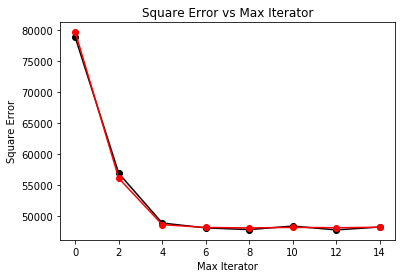

In [39]:
plt.title("Square Error vs Max Iterator")
plt.xlabel("Max Iterator")
plt.ylabel("Square Error")
plt.plot(range(0,16,2),SqErrMaxIter, 'k-o',range(0,16,2),SqErrMaxIter2,'r-o'); 

In [40]:
SqErrRegParam1=[]
SqErrRegParam2=[]

for i in range(0,20):
    s1=0
    s2=0
    a=i/20
    lr = LinearRegression(featuresCol='Quality',labelCol='SalePrice',maxIter=16,regParam=a, elasticNetParam=0.5)
    for x in range(0,10):
        train, test = assembled.randomSplit([0.8,0.2])
        lrModel = lr.fit(train)
        predictions = lrModel.transform(test)
        trainingSummary=lrModel.summary
        s1=s1+trainingSummary.rootMeanSquaredError
    SqErrRegParam1.append(s1/10)
    for x in range(0,10):
        train, test = assembled.randomSplit([0.8,0.2])
        lrModel = lr.fit(train)
        predictions = lrModel.transform(test)
        trainingSummary=lrModel.summary
        s2=s2+trainingSummary.rootMeanSquaredError
    SqErrRegParam2.append(s2/10)

In [41]:
print(SqErrRegParam1,SqErrRegParam2)

[47633.57662543058, 48157.91876861176, 47998.69040423218, 48067.4662148916, 47515.07740529246, 47289.143425525835, 47780.04356649396, 47745.86994833075, 47434.59113469898, 48499.60760283732, 47456.6010615226, 47996.412818812176, 47293.865943649835, 48569.33124953349, 47859.24606657414, 48089.878623203316, 48913.04291228702, 48007.32051796645, 48287.25810650883, 48621.39170439144] [48608.73173557925, 47716.09750781384, 48119.274574881114, 48018.18017429513, 47455.28132024883, 48217.84867384415, 47928.35428179505, 47932.224795860995, 48053.048421621024, 47908.47327121857, 47595.51261744787, 47832.48195412619, 47864.136667440864, 48376.7801722759, 48398.76375525342, 47837.35045087658, 48208.18633147057, 48647.60692546492, 47464.803317226084, 47446.65131568168]


The Graph below shows the relationship between the Square Error and the Reg Parameter while keeping all other parameters constant. There are two colored line graphs, both show the same relatonship in two different samples of data. The use of two graphs is meant to show how random the relationship is. In this example, it is likely that this parameter doesn't matter as much since the two samples are not very similar and seem a bit random.

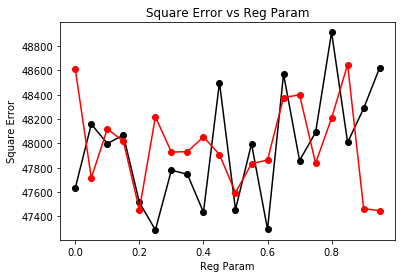

In [42]:
plt.title("Square Error vs Reg Param")
plt.xlabel("Reg Param")
plt.ylabel("Square Error")
plt.plot([x/20 for x in range(0,20)],SqErrRegParam1, 'k-o',[x/20 for x in range(0,20)],SqErrRegParam2, 'r-o'); 

In [43]:
SqErrElasticNetParam1=[]
SqErrElasticNetParam2=[]
for i in range(0,20):
    s1=0
    s2=0
    a=i/20
    lr = LinearRegression(featuresCol='Quality',labelCol='SalePrice',maxIter=16,regParam=.2, elasticNetParam=a)
    for x in range(0,10):
        train, test = assembled.randomSplit([0.8,0.2])
        lrModel = lr.fit(train)
        predictions = lrModel.transform(test)
        trainingSummary=lrModel.summary
        s1=s1+trainingSummary.rootMeanSquaredError
    SqErrElasticNetParam1.append(s1/10)
    for x in range(0,10):
        train, test = assembled.randomSplit([0.8,0.2])
        lrModel = lr.fit(train)
        predictions = lrModel.transform(test)
        trainingSummary=lrModel.summary
        s2=s2+trainingSummary.rootMeanSquaredError
    SqErrElasticNetParam2.append(s2/10)

In [44]:
print(SqErrElasticNetParam1,SqErrElasticNetParam2)

[48303.686417606004, 48471.32501772138, 47641.90591658374, 48121.396757597264, 47672.17097780956, 47543.62423288093, 47837.60215032934, 48125.22933425121, 48273.21612198469, 47369.29772699561, 48441.795255441, 48392.70029212663, 47873.48340947232, 48385.41175724835, 48242.42970697004, 48353.55963471706, 47766.28605063847, 47948.87573180553, 48214.509292369265, 47966.9943438238] [48066.57748760776, 48664.33118511317, 48191.23592673127, 48030.25916504597, 47960.27713197658, 48130.87354007565, 47977.83417203109, 47709.736827478584, 48363.37063006475, 47897.7014464971, 48332.655556076716, 48143.41489391382, 47844.21751752622, 48513.92896529021, 47694.80019377032, 47514.16583799226, 48051.27782136945, 48247.570599369894, 48071.644857284366, 47509.99046431682]


The Graph below shows the relationship between the Square Error and the Elastic Net Parameter while keeping all other parameters constant. There are two colored line graphs, both show the same relatonship in two different samples of data. The use of two graphs is meant to show how random the relationship is. In this example, it is likely that this parameter doesn't matter as much since the two samples are not very similar and seem a bit random.

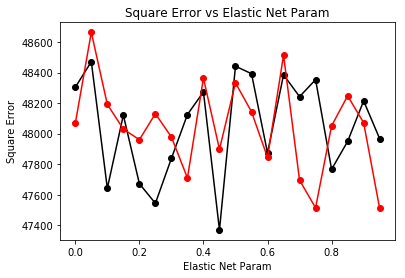

In [45]:
plt.title("Square Error vs Elastic Net Param")
plt.xlabel("Elastic Net Param")
plt.ylabel("Square Error")
plt.plot([x/20 for x in range(0,20)],SqErrElasticNetParam1, 'k-o',[x/20 for x in range(0,20)],SqErrElasticNetParam2, 'r-o'); 

In [14]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [62]:
assembler = VectorAssembler(
  inputCols=["OverallQual","OverallCond","YearBuilt"], outputCol="Quality"
)

assembled = assembler.transform(housingData)

In [65]:
train, test = assembled.randomSplit([0.8,0.2])
dt = DecisionTreeRegressor(featuresCol="Quality",)

In [73]:
train.count()

1189

In [68]:
model = dt.fit(train['SalePrice'])

TypeError: Column is not iterable